# Rising inequality but everyone is better of: Armenia edition

#### This is my first project with Python. My goal is to explore the data, and answer the question if the wage gap among different industries is increasing in Armenia.


The data is acquired from the Statistical Committee of Armenia. The industry sectors are previously translated English and AMD is converted to USD as of 8/3/2018 when USD=481AMD, done using Excel. The table shows the mean salaries for different industries of Armenia from 2009 to 2016. 

## Preparing the Data 


In [1]:
import pandas as pd

In [2]:
!ls 

Industries Armenia.ipynb
Introduction to Pandas.ipynb
PS-eu-19.csv
PS-eu-9.csv
fig1.png
movielens
notebook.tex
output_13_1.png
output_15_1.png


In [3]:
!head ./PS-eu-19.csv
#Some exploration of the Data

"	2009	2010	2011	2012	2012*	2013**	2014	2015	2016												"
"Agriculture	144.1977275	146.3482919	145.3735906	173.4470623	209.2061576	190.8693299	207.169654	234.6043853	238.6815402												"
"Mining	364.9592803	449.7790331	492.8919388	535.3121844	596.610528	657.496179	686.3825931	748.6017184	722.5771932												"
"Manufacturing	191.8875817	208.4243227	210.589404	230.1477191	275.2390611	282.2672797	296.4149656	322.5991759	326.1184698												"
"Energy	291.095585	310.6165712	315.622803	319.2976344	370.0857945	401.0937393	467.1038306	468.4538956	576.8572726												"
"Water	189.3181031	207.7212935	232.6591304	230.01292	275.0793759	289.6127947	317.4353327	340.6995867	386.1414063												"
"Construction	253.8288134	284.1897225	285.1167257	280.3427631	329.2354401	324.9737142	371.8609951	422.1016634	371.5540679												"
"Trade	143.5029936	153.3889535	163.3226116	169.7784525	202.7129878	218.5238874	241.6554161	265.5708535	271.3568464												"
"Transportation	181.721654

In [10]:
industries = pd.read_csv('./PS-eu-19.csv', sep='\t')
#Importing the csv file as a DataFrame

In [21]:
industries.head()

,2009,2010,2011,2012,2014,2015,2016
Unnamed: 0,,,,,,,
Agriculture,144.197727,146.348292,145.373591,173.447062,207.169654,234.604385,238.681540
Mining,364.959280,449.779033,492.891939,535.312184,686.382593,748.601718,722.577193
Manufacturing,191.887582,208.424323,210.589404,230.147719,296.414966,322.599176,326.118470
Energy,291.095585,310.616571,315.622803,319.297634,467.103831,468.453896,576.857273
Water,189.318103,207.721294,232.659130,230.012920,317.435333,340.699587,386.141406


In [12]:
industries = industries.drop(['Unnamed: 10', 'Unnamed: 11', '2012*', '2013**', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],   axis=1)
#Dropping extra columns

In [13]:
industries=industries.set_index('Unnamed: 0')
#Setting the indices to be the the names of industry column

## Exploring the data

In [22]:
industries.describe()

,2009,2010,2011,2012,2014,2015,2016
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,219.583507,234.332386,247.760452,259.515372,348.492613,374.640695,387.923811
std,114.327766,126.842887,132.172355,140.509484,179.072393,183.394870,187.919691
min,113.100608,119.332475,129.979531,136.474775,183.303989,210.083389,226.406525
25%,143.850361,145.537423,155.483524,168.026064,232.399901,253.366349,260.502407
50%,189.318103,197.186224,210.589404,217.673616,284.662556,293.735574,301.093532
75%,241.467734,261.223064,268.559246,272.580408,389.138094,436.564572,416.404845
max,569.968001,572.688869,587.309389,610.747845,823.077194,811.859834,820.238117


In [24]:
transpose=industries.transpose()
transpose.describe()

Unnamed: 0,Agriculture,Mining,Manufacturing,Energy,Water,Construction,Trade,Transportation,Hospitality,Telecommunications,Financial se,Real estate,Technology and Science,Administration,"Government, army",Education,Healthcare,Entertainment,Service
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,184.260322,571.500563,255.168806,392.721085,271.998253,324.142107,201.225161,241.487139,169.374055,550.617365,685.127036,202.671511,278.813756,228.324524,326.899120,193.519984,210.264701,169.072164,167.487756
std,42.214668,148.521152,57.857430,110.738753,75.377860,63.380565,55.885414,49.976070,39.860703,131.348230,125.399996,62.149488,65.605043,43.698750,102.436873,42.172148,67.034792,56.513071,40.019973
min,144.197727,364.959280,191.887582,291.095585,189.318103,253.828813,143.502994,181.721654,127.090682,383.150940,569.968001,144.726555,213.331011,185.858950,229.106655,156.111896,136.163700,113.100608,127.940954
25%,145.860941,471.335486,209.506863,313.119687,218.867107,282.266243,158.355783,205.761522,137.321936,460.363875,579.999129,153.472944,227.454847,195.100985,245.129086,159.571048,158.549686,124.656003,139.533678
50%,173.447062,535.312184,230.147719,319.297634,232.659130,285.116726,169.778452,217.673616,154.900778,514.826866,610.747845,165.574794,244.430204,198.333053,264.818052,166.273675,180.379885,136.474775,142.934763
75%,220.887020,704.479893,309.507071,467.778863,329.067460,371.707531,253.613135,289.199065,201.288265,647.223449,816.048976,255.878797,335.431015,270.542867,426.541739,231.732127,274.089121,221.727959,196.693689
max,238.681540,748.601718,326.118470,576.857273,386.141406,422.101663,271.356846,301.093532,226.406525,741.169102,823.077194,289.695748,368.163352,282.791959,451.027480,249.647967,290.031709,241.161844,229.083843


## Visualizing the data

In [15]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

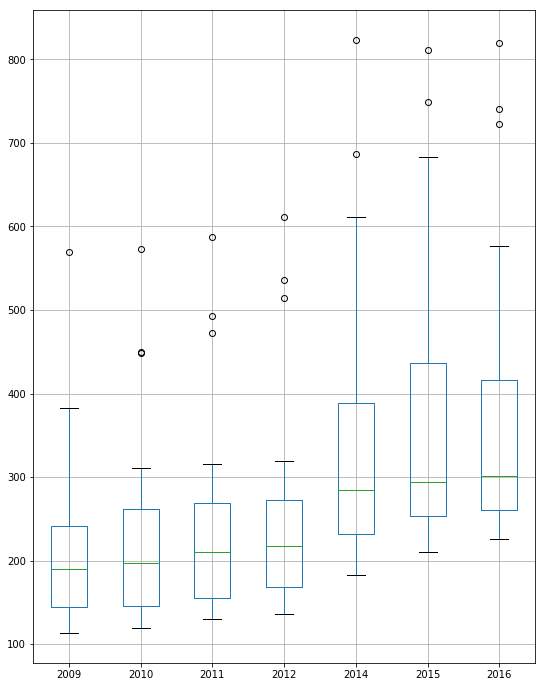

In [16]:
industries.boxplot(figsize=(9,12))

Here we can see that the mean salary overall is increasing when taken together over these years.

In [36]:
means=transpose.mean()
vc=means.values
means=pd.Series.sort_values(means)
indices=means.index

In [70]:
industries=industries.set_index(vc)
industries_sorted=industries.sort_index(ascending=True)
#sorting the table for further analysis

In [64]:
industries_sorted=industries_sorted.set_index(indices)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text xticklabel objects>)

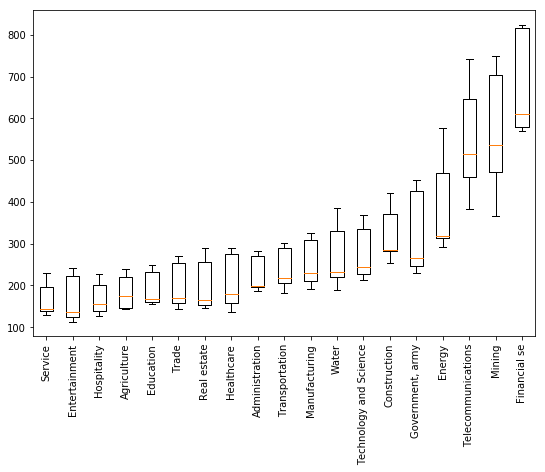

In [74]:
# Create a figure instance
fig = plt.figure(figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(1, 1, 1)


# Create the boxplotindex
bp = ax.boxplot(industries_sorted, labels= indices)

plt.xticks(rotation=90)

This plot shows how the mean salaries differ depending on the sector, but it does not show if the difference has increased over these years or not.

In [75]:
transpose=industries_sorted.transpose()
sd=transpose.std()

167.487756     40.019973
169.072164     56.513071
169.374055     39.860703
184.260322     42.214668
193.519984     42.172148
201.225161     55.885414
202.671511     62.149488
210.264701     67.034792
228.324524     43.698750
241.487139     49.976070
255.168806     57.857430
271.998253     75.377860
278.813756     65.605043
324.142107     63.380565
326.899120    102.436873
392.721085    110.738753
550.617365    131.348230
571.500563    148.521152
685.127036    125.399996
dtype: float64

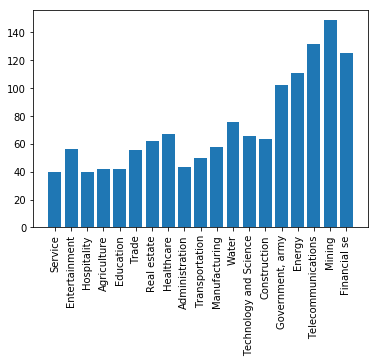

In [69]:

sector = sd.index
# get the values 
var = sd.values

# create
plt.bar(sector, var, label=sector)
plt.xticks(rotation=90)
plt.show()

The standard deviation of sectors gives us an idea how much there was an increase over these years in different sectors. The higher the standard deviation the higher is the increase.

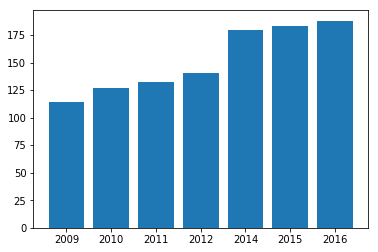

In [46]:
sd2=industries.std()
sd2

# get the years
years = sd2.index.values
years
# get the values 
variety= sd2.values

# create
plt.bar(years,variety)
plt.show()


The standard deviation of years shows the variability among different sectors in different years. The higher the standard deviation, the more is the difference among sectors and the more is the inequality. 

#### As a conclusion, there has clearly been an increase in salaries overall, but it is not equal in all sectors and the wage gap is increasing.